In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks

In [18]:
# Data information:
# - input_noisy: Input data with 5% noise added
# - input: Input data without noise
# - The data contains between 1 and 4 peaks per voxel/spectrum
# - The number of peaks is provided in a separate array

In [19]:
data = loadmat('..\data\data_T1_Q32_P8_400k.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ref', 'no_comp', 'input', 'input_noisy'])

In [20]:
input_noisy = data['input_noisy']
input_clean = data['input']
no_comp = data['no_comp']
ref = data['ref']

In [21]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [22]:
print("Shape of input data:", input_clean.shape)
print("Shape of noisy input data:", input_noisy.shape)
print("Shape of reference data:", ref.shape)
print("Shape of number of components:", no_comp.shape)

print(f"Clean input: [{input_clean.min():.3f}, {input_clean.max():.3f}]")
print(f"Noisy input: [{input_noisy.min():.3f}, {input_noisy.max():.3f}]")
print(f"Reference: [{ref.min():.3f}, {ref.max():.3f}]")

Shape of input data: (8, 400000)
Shape of noisy input data: (8, 400000)
Shape of reference data: (32, 400000)
Shape of number of components: (400000, 1)
Clean input: [-0.639, 0.601]
Noisy input: [-0.648, 0.614]
Reference: [0.000, 0.865]



--- Component Count Distribution ---


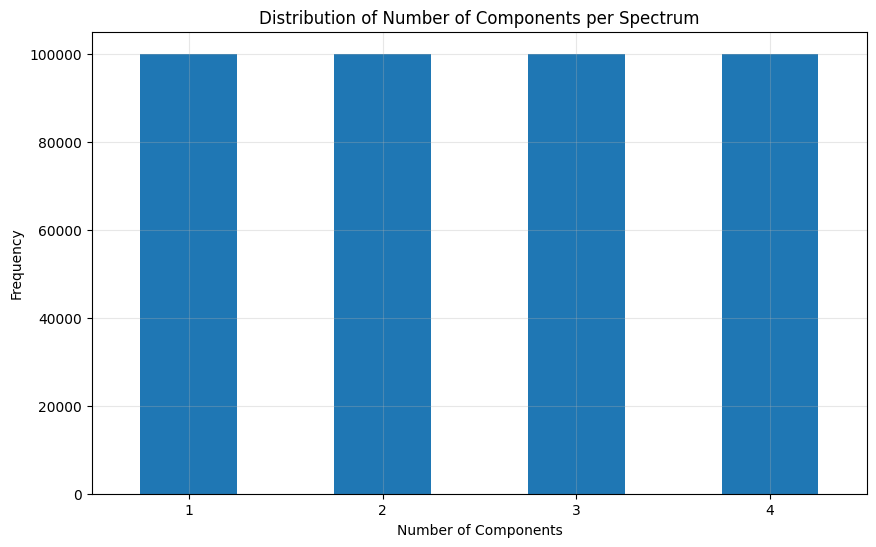


Number of spectra per component count:
1 component(s): 100000 spectra (25.0%)
2 component(s): 100000 spectra (25.0%)
3 component(s): 100000 spectra (25.0%)
4 component(s): 100000 spectra (25.0%)


In [23]:
# Component Count Distribution
print("\n--- Component Count Distribution ---")
plt.figure()
component_counts = pd.Series(no_comp.flatten()).value_counts().sort_index()
component_counts.plot(kind='bar')
plt.title('Distribution of Number of Components per Spectrum')
plt.xlabel('Number of Components')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.show()

print("\nNumber of spectra per component count:")
for components, count in component_counts.items():
    print(f"{components} component(s): {count} spectra ({count/len(no_comp)*100:.1f}%)")

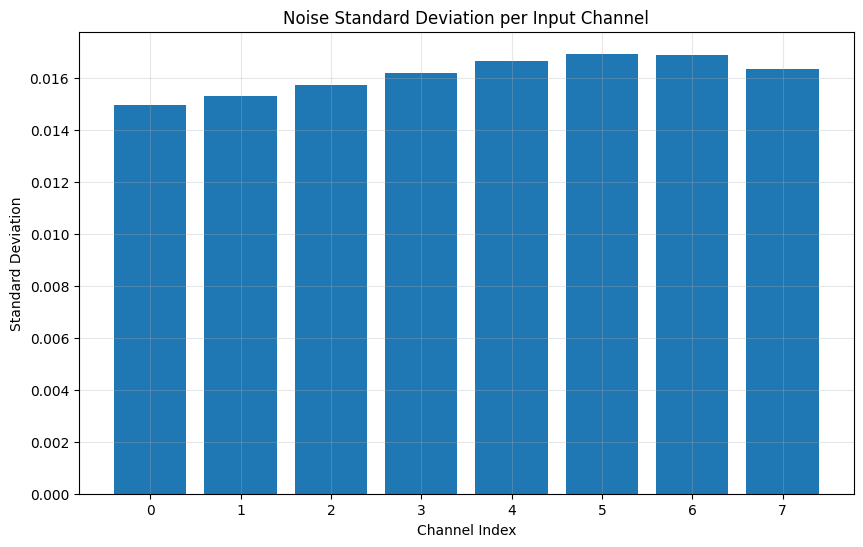


Noise statistics:
Mean std: 0.01613
Min std: 0.01496
Max std: 0.01693


In [ ]:
# Noise Analysis

noise_difference = input_noisy - input_clean
noise_std = np.std(noise_difference, axis=1)

plt.figure()
plt.bar(range(len(noise_std)), noise_std)
plt.title('Noise Standard Deviation per Input Channel')
plt.xlabel('Channel Index')
plt.ylabel('Standard Deviation')
plt.grid(True, alpha=0.3)
plt.show()

print("\nNoise statistics:")
print(f"Mean std: {noise_std.mean():.5f}")
print(f"Min std: {noise_std.min():.5f}")
print(f"Max std: {noise_std.max():.5f}")

In [25]:
# Signal Statistics
def get_signal_stats(data, name):
    stats = {
        'mean': np.mean(data, axis=1),
        'std': np.std(data, axis=1),
        'min': np.min(data, axis=1),
        'max': np.max(data, axis=1),
        'median': np.median(data, axis=1)
    }
    df = pd.DataFrame(stats)
    print(f"\n{name} Signal Statistics:")
    print(df)
    return df

print("\nSignal Statistics (Clean, Noisy, Ref)")
clean_stats = get_signal_stats(input_clean, "Clean Input")
noisy_stats = get_signal_stats(input_noisy, "Noisy Input")
ref_stats = get_signal_stats(ref, "Reference")


Signal Statistics (Clean, Noisy, Ref)

Clean Input Signal Statistics:
       mean       std       min       max    median
0 -0.496559  0.047591 -0.638664 -0.100874 -0.504928
1 -0.456071  0.065677 -0.523948  0.058993 -0.476736
2 -0.396763  0.096027 -0.451405  0.226395 -0.438523
3 -0.310707  0.133241 -0.404192  0.362363 -0.367184
4 -0.195426  0.167336 -0.354955  0.431542 -0.257701
5 -0.051354  0.188336 -0.278992  0.471759 -0.107683
6  0.114456  0.187216 -0.165494  0.518129  0.077721
7  0.282400  0.160334 -0.010771  0.600618  0.272557

Noisy Input Signal Statistics:
       mean       std       min       max    median
0 -0.496053  0.049855 -0.648394 -0.075087 -0.503000
1 -0.455597  0.067343 -0.563911  0.116837 -0.473449
2 -0.396351  0.097160 -0.519254  0.247705 -0.430813
3 -0.310410  0.134041 -0.466155  0.389810 -0.363812
4 -0.195210  0.167925 -0.418494  0.469465 -0.256416
5 -0.051287  0.188931 -0.355512  0.518741 -0.107148
6  0.114316  0.187763 -0.224067  0.553729  0.077865
7  0.282089  

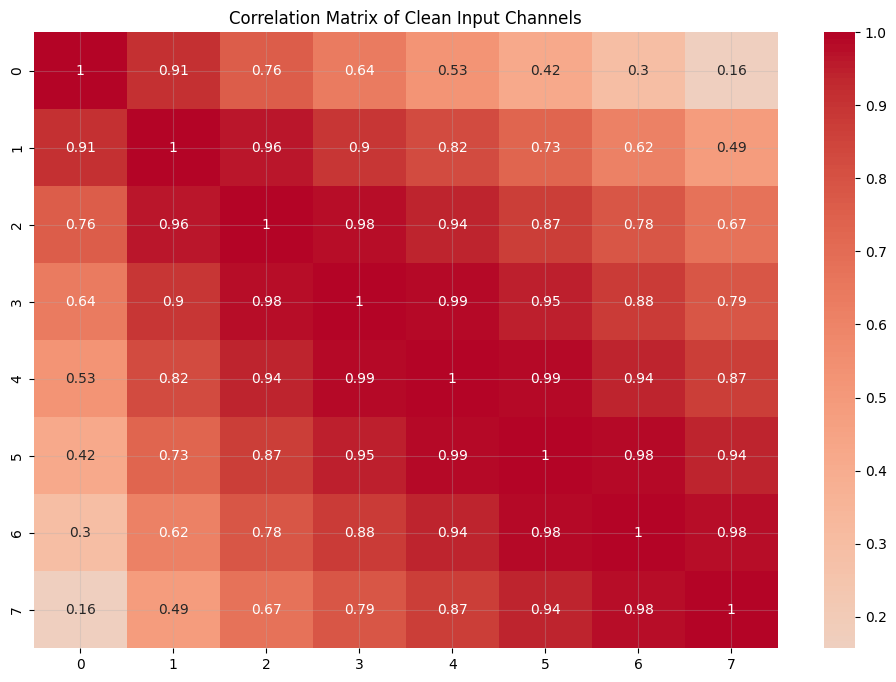


Strongest correlation: 0.987
Between channels: 3 and 4


In [26]:
# Correlation Analysis

plt.figure(figsize=(12, 8))
correlation_matrix = np.corrcoef(input_clean)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Clean Input Channels')
plt.show()


np.fill_diagonal(correlation_matrix, 0)  # Ignore self-correlations
strongest_corr = np.unravel_index(np.argmax(np.abs(correlation_matrix)), correlation_matrix.shape)
print(f"\nStrongest correlation: {correlation_matrix[strongest_corr]:.3f}")
print(f"Between channels: {strongest_corr[0]} and {strongest_corr[1]}")


Example spectrum with 1 component(s):


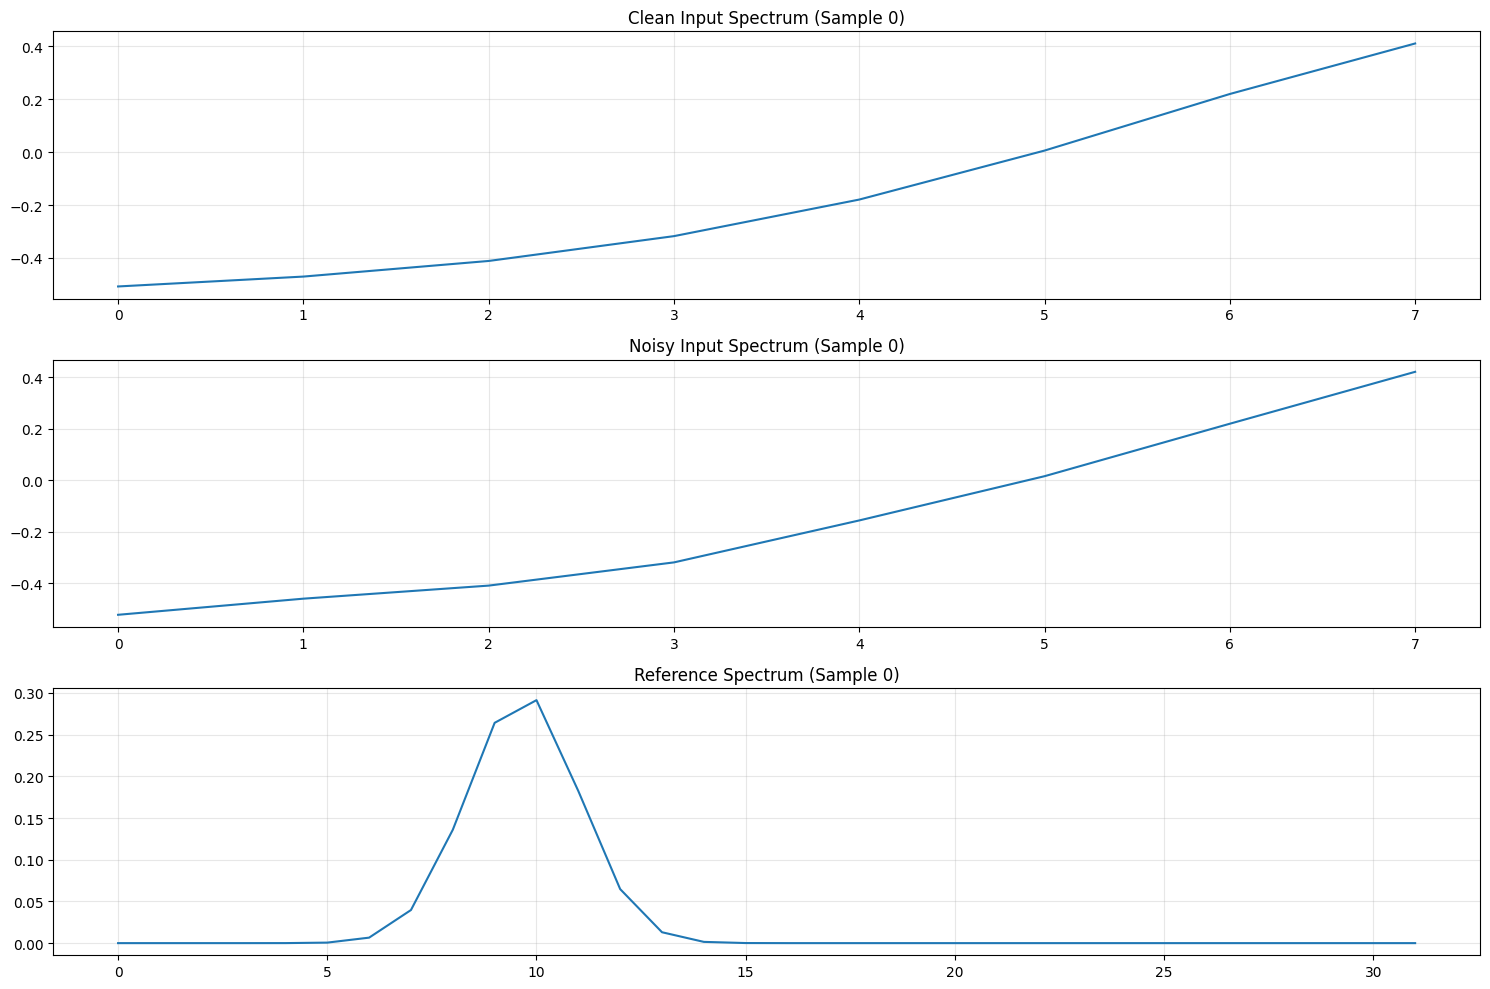

Number of components in this spectrum: 1

Example spectrum with 2 component(s):


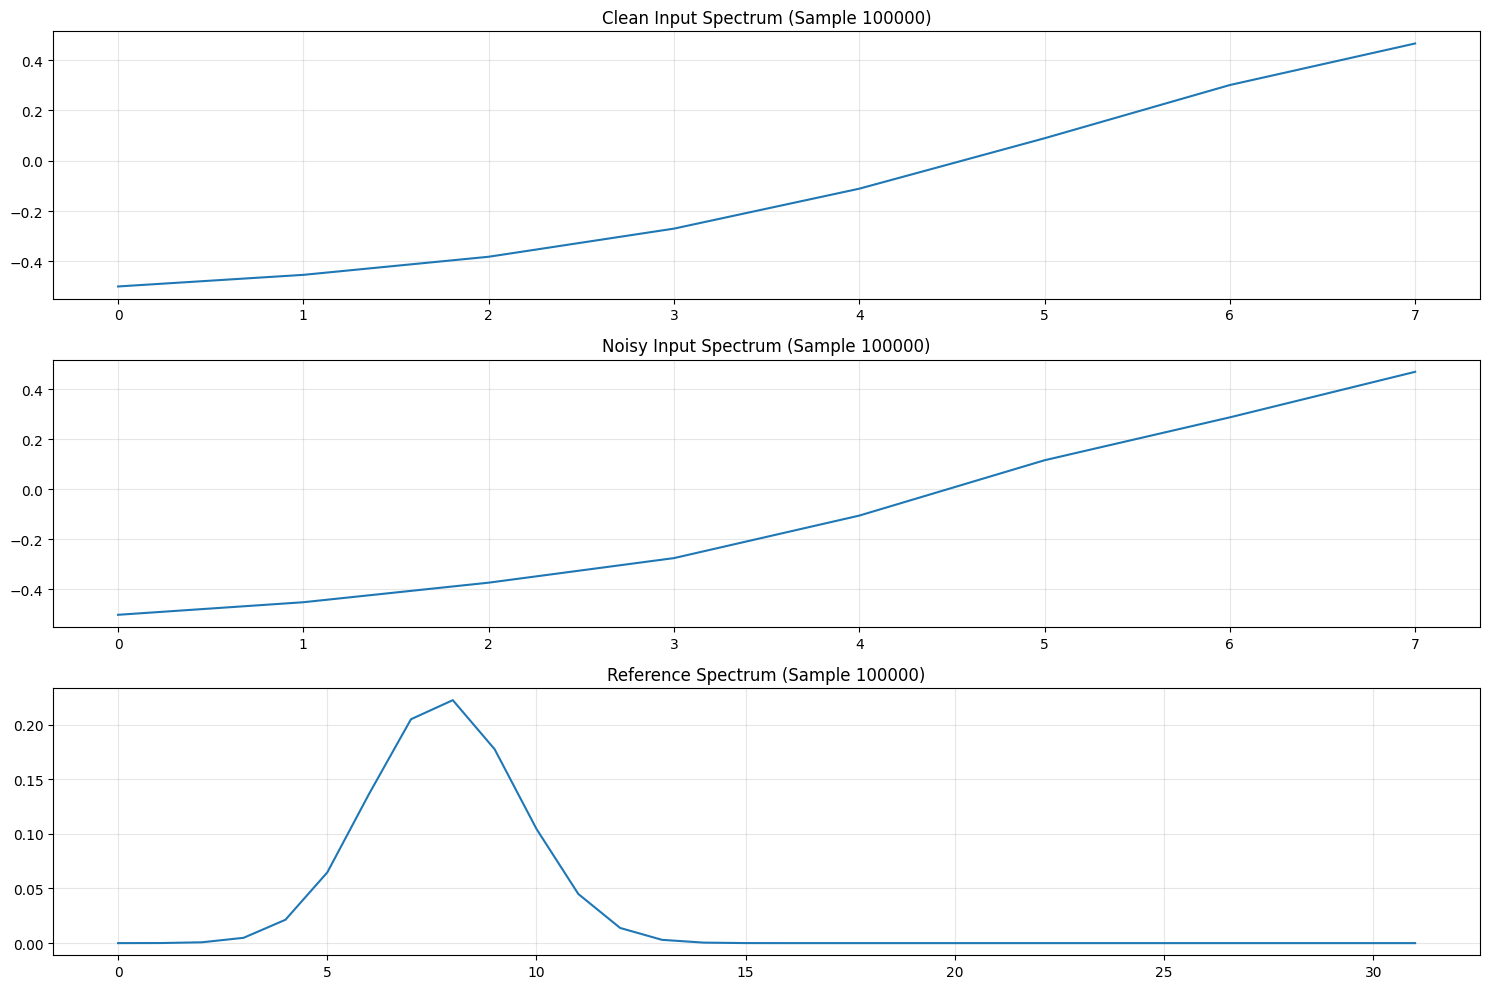

Number of components in this spectrum: 2

Example spectrum with 3 component(s):


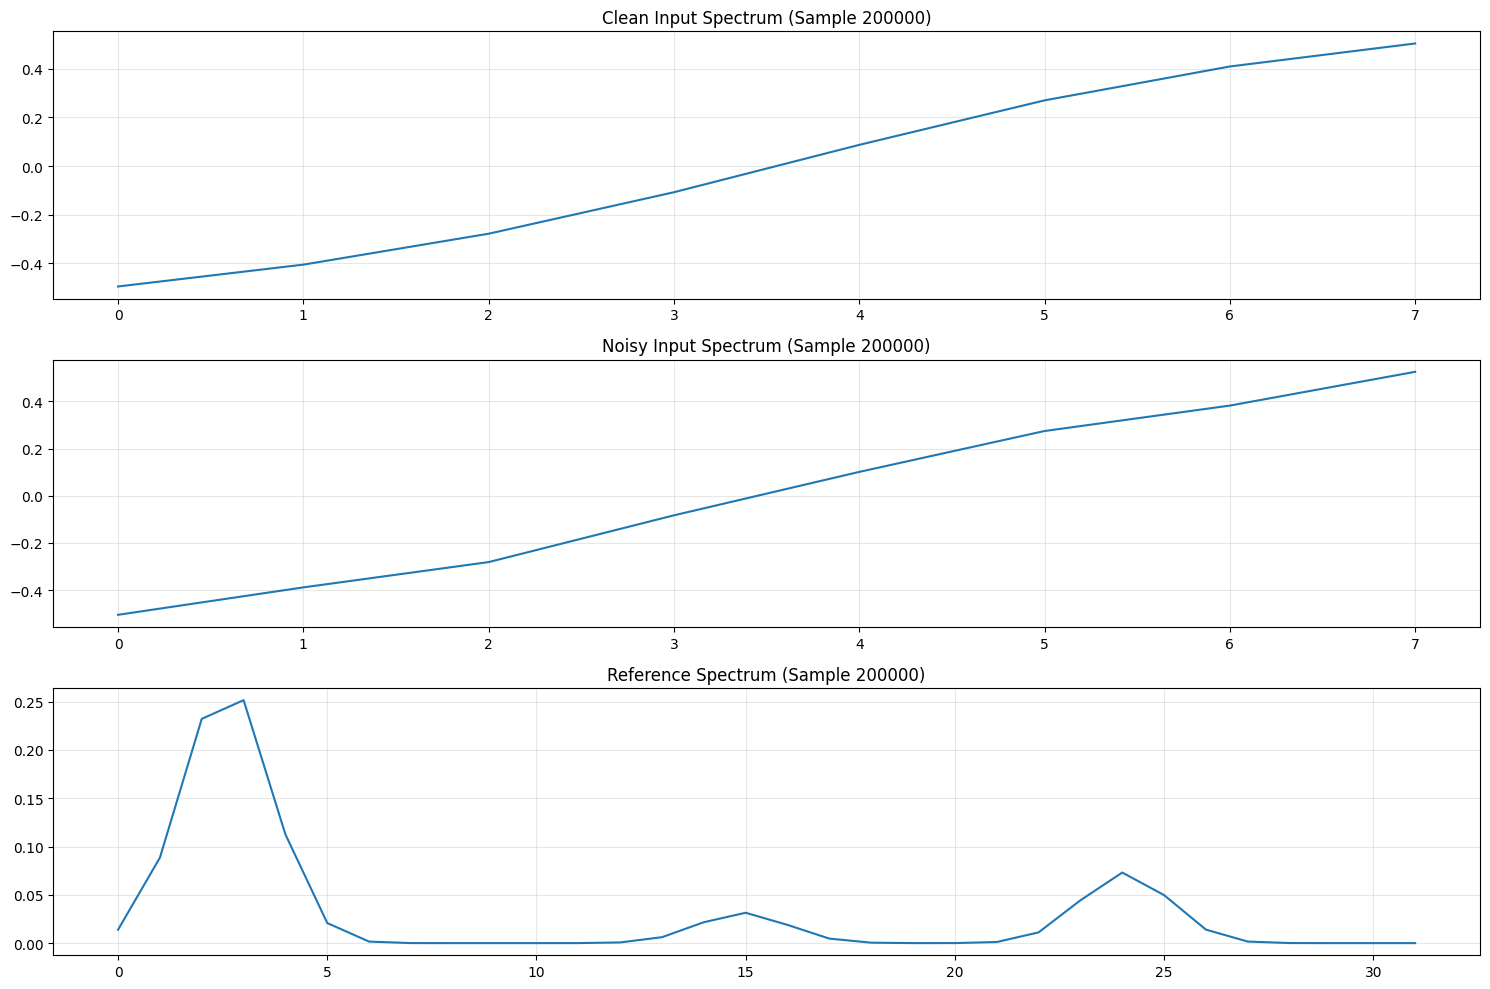

Number of components in this spectrum: 3

Example spectrum with 4 component(s):


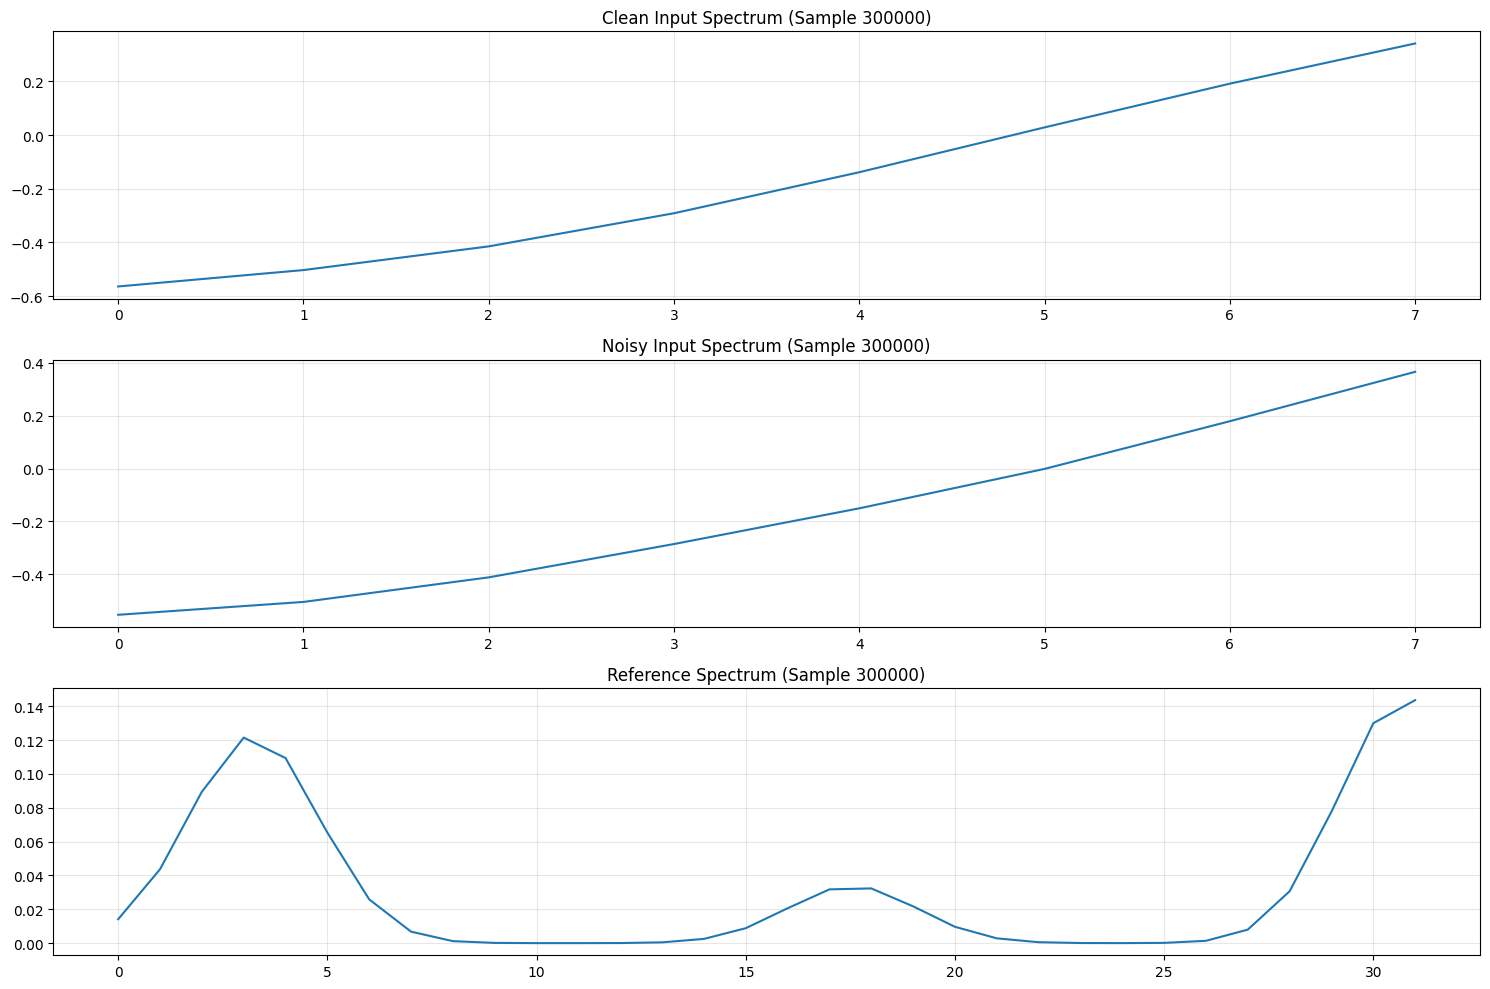

Number of components in this spectrum: 4


In [27]:
# Spectrum Comparison

def plot_spectrum_comparison(clean, noisy, ref, idx):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))
    
    ax1.plot(clean[:, idx])
    ax1.set_title(f'Clean Input Spectrum (Sample {idx})')
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(noisy[:, idx])
    ax2.set_title(f'Noisy Input Spectrum (Sample {idx})')
    ax2.grid(True, alpha=0.3)
    
    ax3.plot(ref[:, idx])
    ax3.set_title(f'Reference Spectrum (Sample {idx})')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print(f"Number of components in this spectrum: {no_comp[idx][0]}")

for n_comp in range(1, 5):
    idx = np.where(no_comp == n_comp)[0][0]
    print(f"\nExample spectrum with {n_comp} component(s):")
    plot_spectrum_comparison(input_clean, input_noisy, ref, idx)

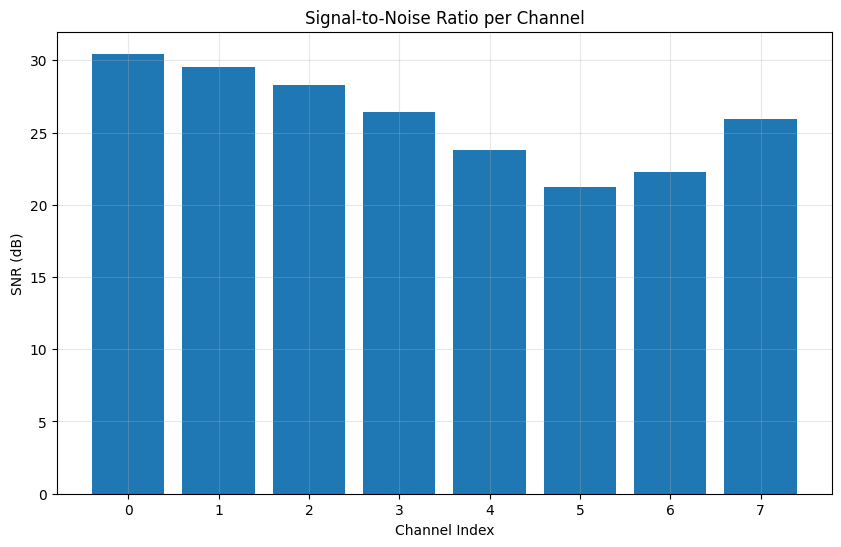


SNR Statistics:
Mean SNR: 25.99 dB
Min SNR: 21.24 dB
Max SNR: 30.46 dB


In [28]:
# Signal-to-Noise Ratio

def calculate_snr(clean, noisy):
    signal_power = np.mean(clean ** 2, axis=1)
    noise_power = np.mean((noisy - clean) ** 2, axis=1)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr_values = calculate_snr(input_clean, input_noisy)

plt.figure()
plt.bar(range(len(snr_values)), snr_values)
plt.title('Signal-to-Noise Ratio per Channel')
plt.xlabel('Channel Index')
plt.ylabel('SNR (dB)')
plt.grid(True, alpha=0.3)
plt.show()

print("\nSNR Statistics:")
print(f"Mean SNR: {np.mean(snr_values):.2f} dB")
print(f"Min SNR: {np.min(snr_values):.2f} dB")
print(f"Max SNR: {np.max(snr_values):.2f} dB")

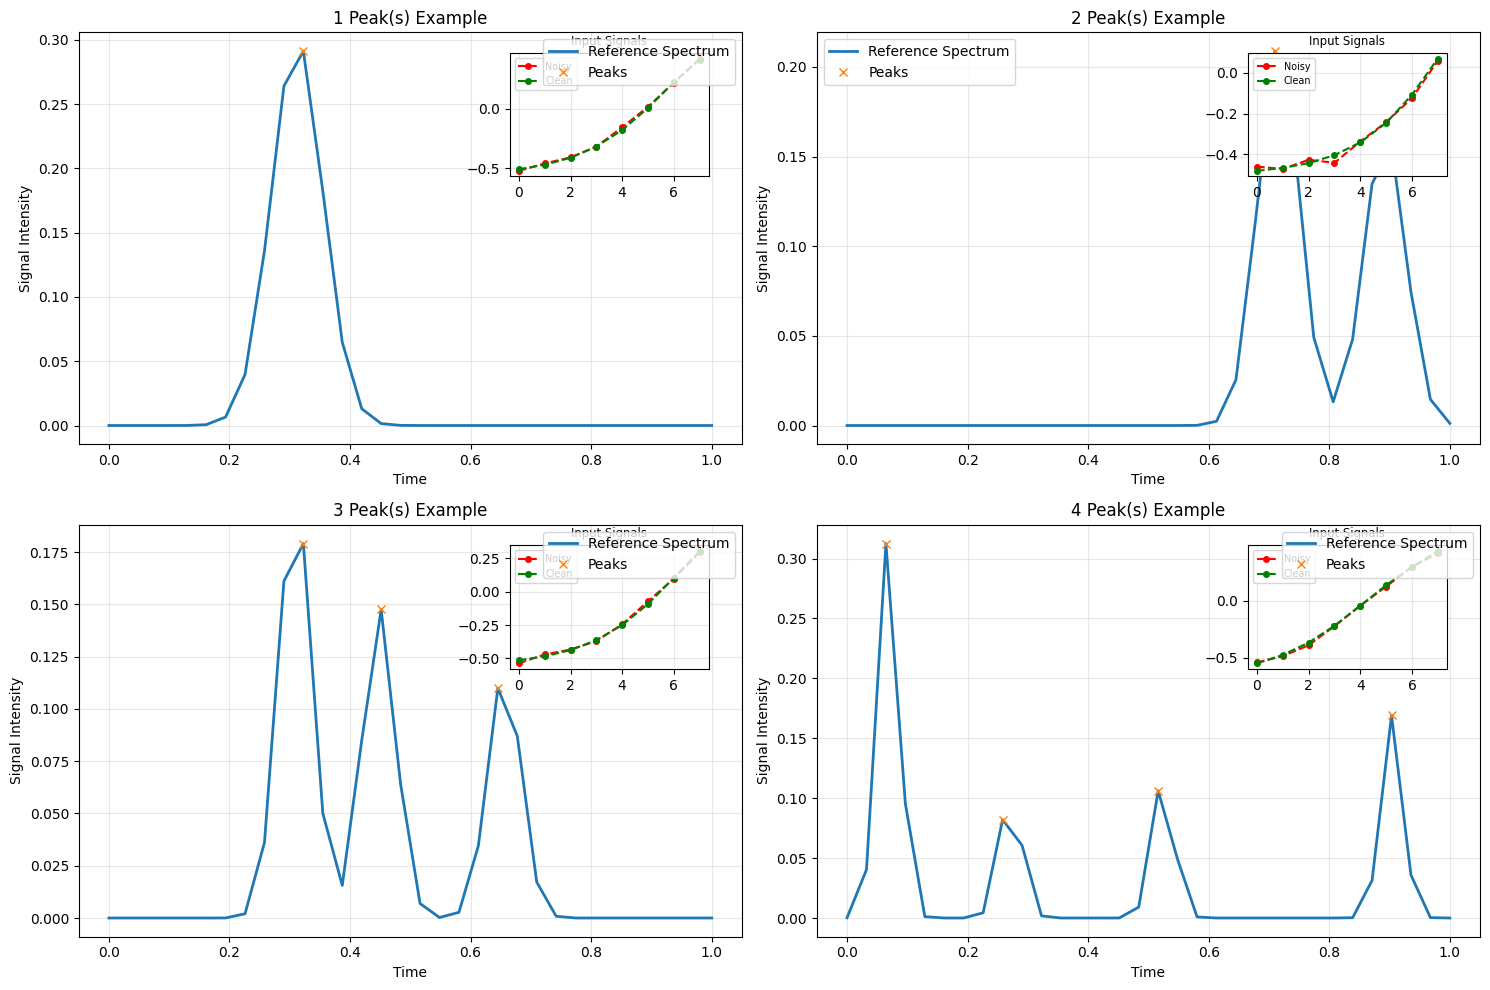

In [29]:
# Peak Visualization
def count_peaks(signal):
    signal_no_nan = np.nan_to_num(signal, nan=0)
    peaks, _ = find_peaks(signal_no_nan, prominence=0.05)
    return len(peaks)

def find_example_for_peaks(ref_data, target_peaks):
    for i in range(ref_data.shape[1]):
        spectrum = ref_data[:, i]
        if count_peaks(spectrum) == target_peaks:
            return spectrum, i
    return None, None

t1_times = np.linspace(0, 1, 32)
inversion_times = np.arange(8)

peak_examples = {}
for num_peaks in [1, 2, 3, 4]:
    spectrum, idx = find_example_for_peaks(ref, num_peaks)
    if spectrum is not None:
        peak_examples[num_peaks] = (spectrum, idx)

plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)

for i, (num_peaks, (spectrum, idx)) in enumerate(peak_examples.items(), 1):
    ax_main = plt.subplot(gs[i - 1])
    ax_main.plot(t1_times, spectrum, '-', linewidth=2, label='Reference Spectrum')

    spectrum_no_nan = np.nan_to_num(spectrum, nan=0)  # Replace NaN with 0
    peaks, _ = find_peaks(spectrum_no_nan, prominence=0.05)
    ax_main.plot(t1_times[peaks], spectrum[peaks], "x", label='Peaks')  # Plot on original data

    ax_inset = ax_main.inset_axes([0.65, 0.65, 0.3, 0.3])
    ax_inset.plot(inversion_times, input_noisy[:, idx], 'ro--', markersize=4, label='Noisy')
    ax_inset.plot(inversion_times, input_clean[:, idx], 'go--', markersize=4, label='Clean')
    ax_main.set_title(f'{num_peaks} Peak(s) Example')
    ax_main.set_xlabel('Time')
    ax_main.set_ylabel('Signal Intensity')
    ax_main.legend()
    ax_main.grid(True)
    ax_inset.grid(True, alpha=0.3)
    ax_inset.legend(fontsize='x-small')
    ax_inset.set_title('Input Signals', fontsize='small')

plt.tight_layout()
plt.show()